# Project: Prediction Taxi Demand in *Nagaoka city*, Japan 


### Table of Contents

1. [Project Background](#Project_Background)


2. [Exploring the Taxi pick-up Data](#Exploring_the_data)

    * [2.1 Data Exploration](#explore-pickup)
    * [2.2 Clustering into suitable regions](#clustering)
            
        
3. [Preparing the weather Data](#prepare-weather)
      
4. [Concatenate pick-up data and weather data interms of date](#concatenate)    

5. [Splitting features and level](#split) 

6. [Building and modeling](#build-modeling)

7. [Deep learning](#dl)

8. [Conclusion](#conclusion)

## 1.  Project Background <a class="anchor" id="Project_Background"></a>

The main goal of this project is to construct a supervised learning model that accurately predicts the Taxi demand in Nagaoka city, Japan. The data resources are pick up interms of location and weather of that date.

In [ ]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # matplotlib for plotting
import datetime      #for datetime operations

#### 2.1 Data Exploration <a class="anchor" id="explore-pickup"></a>
In the code cell below,the following will be computed:

- Drop some features.
- From the feature `'picktime'`, we construct new features month, date of month (dom), date of week (dow), pick-up hour (p_hour)
-  The total number of records

In [2]:
df= pd.read_csv('ride_2019.csv')
df["picktime"]=df["Pickup_Date_Time"].map(pd.to_datetime)
df.rename(columns={'Travel_Shortest_Distance':'SD','Travel_Real_Distance':'RD'}, inplace=True)
all_data=df
df.head()

,No,Pickup_Date_Time,Dropoff_Date_Time,Pickup_Lon,Pickup_Lat,Dropoff_Lon,Dropoff_Lat,SD,RD,Fare (Yen),Travel_Time,picktime
0,1,1/1/2019 11:32,1/1/2019 11:46,138.824728,37.463400,138.848822,37.444482,2.989197,3.997896,1641.287609,0:13:55,2019-01-01 11:32:00
1,2,1/1/2019 12:28,1/1/2019 12:39,138.823339,37.442627,138.852844,37.447183,2.651515,2.945240,1260.809647,0:10:47,2019-01-01 12:28:00
2,3,1/1/2019 14:22,1/1/2019 14:38,138.828900,37.460777,138.852600,37.429438,4.061515,5.878694,2321.094149,0:16:18,2019-01-01 14:22:00
3,4,1/1/2019 15:09,1/1/2019 15:21,138.829005,37.460650,138.838822,37.443594,2.083604,3.352520,1408.019217,0:12:01,2019-01-01 15:09:00
4,5,1/1/2019 16:01,1/1/2019 16:21,138.779249,37.448421,138.851722,37.438816,6.481506,7.723551,2987.909834,0:19:57,2019-01-01 16:01:00


In [3]:
df.shape

(168133, 12)

In [4]:
# Data wragling
all_data=all_data.drop(
                columns=["No","Dropoff_Date_Time","Travel_Time","Fare (Yen)",
                    "Dropoff_Date_Time","Dropoff_Lon","Dropoff_Lat","Pickup_Date_Time"],
                axis=1)
all_data.head()

,Pickup_Lon,Pickup_Lat,SD,RD,picktime
0,138.824728,37.463400,2.989197,3.997896,2019-01-01 11:32:00
1,138.823339,37.442627,2.651515,2.945240,2019-01-01 12:28:00
2,138.828900,37.460777,4.061515,5.878694,2019-01-01 14:22:00
3,138.829005,37.460650,2.083604,3.352520,2019-01-01 15:09:00
4,138.779249,37.448421,6.481506,7.723551,2019-01-01 16:01:00


In [5]:
# Functions to identify dates

def get_month(dt):
    return dt.month

all_data["month"]=all_data["picktime"].map(get_month)

def get_dow(dt):
    return dt.day

all_data["dom"]=all_data["picktime"].map(get_dow)

def get_dow(dt):
    return dt.dayofweek

all_data["dow"]=all_data["picktime"].map(get_dow)

def get_hour(dt):
    return dt.hour

all_data["p_hour"]=all_data["picktime"].map(get_hour)

In [6]:
all_data.head()

,Pickup_Lon,Pickup_Lat,SD,RD,picktime,month,dom,dow,p_hour
0,138.824728,37.463400,2.989197,3.997896,2019-01-01 11:32:00,1,1,1,11
1,138.823339,37.442627,2.651515,2.945240,2019-01-01 12:28:00,1,1,1,12
2,138.828900,37.460777,4.061515,5.878694,2019-01-01 14:22:00,1,1,1,14
3,138.829005,37.460650,2.083604,3.352520,2019-01-01 15:09:00,1,1,1,15
4,138.779249,37.448421,6.481506,7.723551,2019-01-01 16:01:00,1,1,1,16


In [7]:
dframe=all_data.drop(columns=["SD","RD","picktime"],axis=1)
dframe.head()

,Pickup_Lon,Pickup_Lat,month,dom,dow,p_hour
0,138.824728,37.463400,1,1,1,11
1,138.823339,37.442627,1,1,1,12
2,138.828900,37.460777,1,1,1,14
3,138.829005,37.460650,1,1,1,15
4,138.779249,37.448421,1,1,1,16


In [8]:
dframe=dframe[dframe.Pickup_Lon < 140]
dframe

,Pickup_Lon,Pickup_Lat,month,dom,dow,p_hour
0,138.824728,37.463400,1,1,1,11
1,138.823339,37.442627,1,1,1,12
2,138.828900,37.460777,1,1,1,14
3,138.829005,37.460650,1,1,1,15
4,138.779249,37.448421,1,1,1,16
...,...,...,...,...,...,...
168128,138.852627,37.446806,12,31,1,3
168129,138.852766,37.447044,12,31,1,4
168130,138.852305,37.446816,12,31,1,4
168131,138.841350,37.407399,12,31,1,5


In [9]:
df=dframe[dframe.Pickup_Lat < 38]
df

,Pickup_Lon,Pickup_Lat,month,dom,dow,p_hour
0,138.824728,37.463400,1,1,1,11
1,138.823339,37.442627,1,1,1,12
2,138.828900,37.460777,1,1,1,14
3,138.829005,37.460650,1,1,1,15
4,138.779249,37.448421,1,1,1,16
...,...,...,...,...,...,...
168128,138.852627,37.446806,12,31,1,3
168129,138.852766,37.447044,12,31,1,4
168130,138.852305,37.446816,12,31,1,4
168131,138.841350,37.407399,12,31,1,5


#### 2.2 Clustering into suitable regions <a class="anchor" id="clustering"></a>


In [12]:
plt.scatter(df.Pickup_Lon,df.Pickup_Lat)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Text(0.5, 0, 'Longitude')

        Pickup_Lat  Pickup_Lon
60107    37.447317  138.850683
151659   37.438277  138.846767
104966   37.471594  138.764972


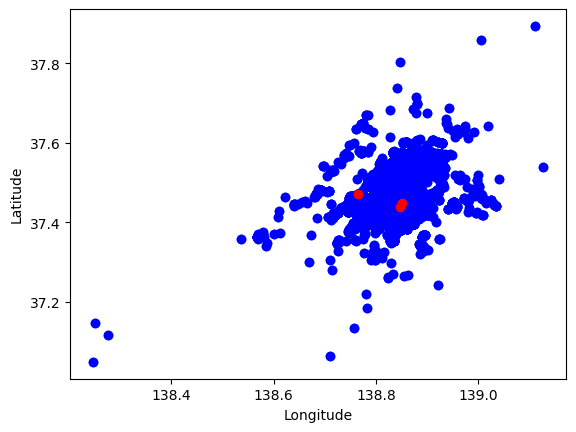

In [13]:
# Clustering 
K = 3
X = df[["Pickup_Lat", "Pickup_Lon"]]
# select random observation as a centriod 
Centroids = (X.sample(n=K))
print(Centroids)

plt.scatter(X["Pickup_Lon"], X["Pickup_Lat"], c="blue")
plt.scatter(Centroids["Pickup_Lon"], Centroids["Pickup_Lat"], c="red")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [14]:
# Algorithm for clustering 

from math import sqrt
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Pickup_Lat"]-row_d["Pickup_Lat"])**2
            d2 = (row_c["Pickup_Lon"]-row_d["Pickup_Lon"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Pickup_Lon", "Pickup_Lat"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Pickup_Lon'] - Centroids['Pickup_Lon']).sum() + (Centroids_new['Pickup_Lat'] - Centroids['Pickup_Lat']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Pickup_Lon","Pickup_Lat"]]

<ipython-input-14-2fca74af993b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


0.01277301289945143
0.05401047739433551
0.06117377606904739
0.0174214261716088
0.0044388993252439946
0.0030323863223742364
0.001547644939890347
0.0005870261644815855
0.0003423368002586358
0.0002196559448961466
0.00017366304403765298
9.715366034157569e-05
-3.18045768921138e-05
9.764525294997384e-06
2.6103620029971353e-06
6.954890068300301e-06
2.5522798168253757e-06
1.334552351295315e-06
1.120939224108497e-06
0.0


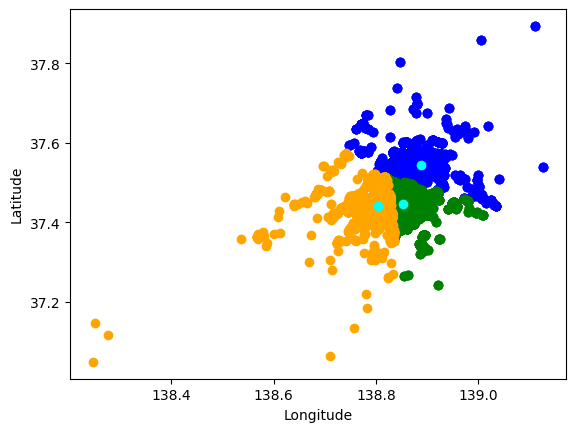

In [17]:
color=['blue','green','orange']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Pickup_Lon"],data["Pickup_Lat"],c=color[k])
plt.scatter(Centroids["Pickup_Lon"],Centroids["Pickup_Lat"],c='cyan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
X1=X[["Cluster"]]
df= pd.concat([df,X1],axis=1)

In [19]:
df.to_csv("data2019.csv",index=False)

In [10]:
df= pd.read_csv('data2019.csv')
print(df.shape)
df.head()

(168133, 7)


,Pickup_Lon,Pickup_Lat,month,dom,dow,p_hour,Cluster
0,138.824728,37.463400,1,1,1,11,3
1,138.823339,37.442627,1,1,1,12,3
2,138.828900,37.460777,1,1,1,14,2
3,138.829005,37.460650,1,1,1,15,2
4,138.779249,37.448421,1,1,1,16,3


## 3. Preparing the weather Data <a class="anchor" id="prepare-weather"></a>

 Calculate hours of whole year 2019 so total rows = 365*24=8760

In [11]:
Weather_df= pd.read_csv('weather_2019.csv')
Weather_df.head(5)

,Date/Time,Precipitation,Temperature,Wind speed / direction (m / s),snowfall,Snow cover
0,1/1/2019 0:00,0.0,0.7,0.5,0.0,6
1,1/1/2019 1:00,0.5,1.3,2.2,0.0,7
2,1/1/2019 2:00,1.5,1.0,2.3,0.0,7
3,1/1/2019 3:00,0.5,0.8,2.3,0.0,7
4,1/1/2019 4:00,1.5,0.5,1.9,0.0,7


In [12]:
wd=Weather_df
wd["picktime"]=wd["Date/Time"].map(pd.to_datetime)

def get_month(dt):
    return dt.month

wd["month"]=wd["picktime"].map(get_month)

def get_dow(dt):
    return dt.day

wd["dom"]=wd["picktime"].map(get_dow)

def get_hr(dt):
    return dt.hour

wd["hours"]=wd["picktime"].map(get_hr)

In [13]:
wd.head()

,Date/Time,Precipitation,Temperature,Wind speed / direction (m / s),snowfall,Snow cover,picktime,month,dom,hours
0,1/1/2019 0:00,0.0,0.7,0.5,0.0,6,2019-01-01 00:00:00,1,1,0
1,1/1/2019 1:00,0.5,1.3,2.2,0.0,7,2019-01-01 01:00:00,1,1,1
2,1/1/2019 2:00,1.5,1.0,2.3,0.0,7,2019-01-01 02:00:00,1,1,2
3,1/1/2019 3:00,0.5,0.8,2.3,0.0,7,2019-01-01 03:00:00,1,1,3
4,1/1/2019 4:00,1.5,0.5,1.9,0.0,7,2019-01-01 04:00:00,1,1,4


In [14]:
wd.rename(columns={'Wind speed / direction (m / s)':'WindSpeed','Precipitation':'prec','Temperature':'temp'}, inplace=True)
wd=wd.drop(columns=["picktime"],axis=1)

In [17]:
wd.head()

,Date/Time,prec,temp,WindSpeed,snowfall,Snow cover,month,dom,hours
0,1/1/2019 0:00,0.0,0.7,0.5,0.0,6,1,1,0
1,1/1/2019 1:00,0.5,1.3,2.2,0.0,7,1,1,1
2,1/1/2019 2:00,1.5,1.0,2.3,0.0,7,1,1,2
3,1/1/2019 3:00,0.5,0.8,2.3,0.0,7,1,1,3
4,1/1/2019 4:00,1.5,0.5,1.9,0.0,7,1,1,4


## 4. Concatenate pick-up data and weather data interms of date  <a class="anchor" id="concatenate"></a>

1. The rows of weather data is 8760 and extend with the three cluster so the total records are 8760*3= 26280 
2. Calculate demand and classify its level as 0 if less ; 1, if medium; 2, high

In [18]:
def count_rows(rows):
    return len(rows)

mycolumns = ['month', 'dom','p_hour','Cluster',"demand","DemandLevel","preci","tempar","windspeed","snowfall"] 
s2= pd.DataFrame(columns=mycolumns)

for k1 in range(12):
    df1=df[df['month'] ==k1+1]
    df9=wd[wd['month'] ==k1+1] 
    if k1+1==2:
        hmd=28
        print(hmd)
    elif(k1+1==4 or k1+1==6  or k1+1==9 or k1+1==11):
        hmd=30
        print(hmd)
    else:
        hmd=31
        print(hmd)
    for k2 in range(hmd):
        df2=df1[df1['dom'] ==k2+1]  
        df8=df9[df9['dom'] ==k2+1] 
        for k3 in range(24):
            df3=df2[df2['p_hour'] ==k3]  
            df7=df8[df8['hours'] ==k3] 
            valPrec = df7['prec'].values[0]
            valTemp = df7['temp'].values[0]
            valSpeed = df7['WindSpeed'].values[0]
            valSnow = df7['snowfall'].values[0]
            for k5 in range(3):
                x1=len(df3[df3['Cluster'] == k5+1])
                if x1 <= 5:
                    s2 = s2.append({'month':k1+1,'dom':k2+1,'p_hour':k3,'Cluster':k5+1,"demand": x1, "DemandLevel": "0","preci":valPrec,"tempar":valTemp,"windspeed":valSpeed,"snowfall":valSnow}, ignore_index=True)
                elif 5<x1<15: 
                     s2 = s2.append({'month':k1+1,'dom':k2+1,'p_hour':k3,'Cluster':k5+1,"demand": x1, "DemandLevel": "1","preci":valPrec,"tempar":valTemp,"windspeed":valSpeed,"snowfall":valSnow}, ignore_index=True)
                else:
                     s2 = s2.append({'month':k1+1,'dom':k2+1,'p_hour':k3,'Cluster':k5+1,"demand": x1, "DemandLevel": "2","preci":valPrec,"tempar":valTemp,"windspeed":valSpeed,"snowfall":valSnow}, ignore_index=True)


31
28
31
30
31
30
31
31
30
31
30
31


In [19]:
s2.head()

,month,dom,p_hour,Cluster,demand,DemandLevel,preci,tempar,windspeed,snowfall
0,1,1,0,1,0,0,0.0,0.7,0.5,0.0
1,1,1,0,2,16,2,0.0,0.7,0.5,0.0
2,1,1,0,3,2,0,0.0,0.7,0.5,0.0
3,1,1,1,1,0,0,0.5,1.3,2.2,0.0
4,1,1,1,2,10,1,0.5,1.3,2.2,0.0


In [20]:
s2.to_csv("rideweather.csv",index=False)
print(s2.shape)

(26280, 10)


In [21]:
s3 = pd.get_dummies(s2[["month","dom","p_hour","Cluster"]], drop_first=False)
print(s3.shape) 

(26280, 70)


In [22]:
X = pd.concat([s2[["preci","tempar","windspeed","snowfall","DemandLevel"]],s3],axis=1)    
print(X.shape)
X.head(10)

(26280, 75)


,preci,tempar,windspeed,snowfall,DemandLevel,month_1,month_2,month_3,month_4,month_5,...,p_hour_17,p_hour_18,p_hour_19,p_hour_20,p_hour_21,p_hour_22,p_hour_23,Cluster_1,Cluster_2,Cluster_3
0,0.0,0.7,0.5,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.7,0.5,0.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.7,0.5,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.5,1.3,2.2,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.5,1.3,2.2,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.5,1.3,2.2,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1.5,1.0,2.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1.5,1.0,2.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1.5,1.0,2.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0.5,0.8,2.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
data= X.copy()

## 5. Splitting features and level <a class="anchor" id="split"></a>

In [24]:
x = data.drop('DemandLevel',axis=1)   # split prediction features
y = data['DemandLevel']   # Predicted class (1=True, 0=False) 
x.head()

,preci,tempar,windspeed,snowfall,month_1,month_2,month_3,month_4,month_5,month_6,...,p_hour_17,p_hour_18,p_hour_19,p_hour_20,p_hour_21,p_hour_22,p_hour_23,Cluster_1,Cluster_2,Cluster_3
0,0.0,0.7,0.5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.7,0.5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.7,0.5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.5,1.3,2.2,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.5,1.3,2.2,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
X.shape

(26280, 75)

##  6. Building and training classifier <a class="anchor" id="build-modeling"></a>

Now that the data is ready, it's time to build and train the classifier. We are going to consider following classifiers: ` K Neighbors Classifier `, ` Logistic Regression`, ` Random Forest`, ` Decision Tree Classifier`, ` Gradient Boosting Classifier`.

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

## K Neighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, confusion_matrix
model = KNeighborsClassifier()
model.fit(x_train, y_train)
preds =model.predict(x_test)
print(classification_report(preds, y_test))

predict_train = model.predict(x_train)

predict_test = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      3327
           1       0.11      0.28      0.16       195
           2       0.43      0.73      0.54       420

    accuracy                           0.78      3942
   macro avg       0.51      0.61      0.53      3942
weighted avg       0.88      0.78      0.82      3942



In [35]:
train_MAPE = mean_absolute_error(y_train, predict_train)*100                                                   
train_MSE = mean_squared_error(y_train, predict_train)*100

print('\n MAPE on train dataset : ', train_MAPE)
print('\n MSE on train dataset : ', train_MSE)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)*100
print('\naccuracy_score on train dataset : ', accuracy_train)
f1score_train=f1_score(y_train,predict_train, average='macro')*100
print('\n accuracy_f1 score on train dataset : ',f1score_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 
test_MAPE = mean_absolute_error(y_test, predict_test)*100 
test_MSE = mean_squared_error(y_test, predict_test)*100

print('\n MAPE on test dataset : ', test_MAPE)
print('\n MSE on test dataset : ', test_MSE)

f1score_test=f1_score(y_test,predict_test, average='macro')*100
print('\n accuracy_f1 score on test dataset : ',f1score_test)

# Accuray Score on train dataset
accuracy_test = accuracy_score(y_test,predict_test)*100
print('\naccuracy_score on test dataset : ', accuracy_test)


 MAPE on train dataset :  23.654758707135823

 MSE on train dataset :  35.84922553496284

accuracy_score on train dataset :  82.44247470677769

 accuracy_f1 score on train dataset :  63.69323202690778

Target on test data ['0' '0' '0' ... '0' '0' '0']

 MAPE on test dataset :  29.883307965499746

 MSE on test dataset :  45.053272450532724

 accuracy_f1 score on test dataset :  53.02211878187704

accuracy_score on test dataset :  77.70167427701674


##  Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [37]:
train_MAPE = mean_absolute_error(y_train, predict_train)*100                                                   
train_MSE = mean_squared_error(y_train, predict_train)*100

print('\n MAPE on train dataset : ', train_MAPE)
print('\n MSE on train dataset : ', train_MSE)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)*100
print('\naccuracy_score on train dataset : ', accuracy_train)
f1score_train=f1_score(y_train,predict_train, average='macro')*100
print('\n accuracy_f1 score on train dataset : ',f1score_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 
test_MAPE = mean_absolute_error(y_test, predict_test)*100 
test_MSE = mean_squared_error(y_test, predict_test)*100

print('\n MAPE on test dataset : ', test_MAPE)
print('\n MSE on test dataset : ', test_MSE)

f1score_test=f1_score(y_test,predict_test, average='macro')*100
print('\n accuracy_f1 score on test dataset : ',f1score_test)

# Accuray Score on train dataset
accuracy_test = accuracy_score(y_test,predict_test)*100
print('\naccuracy_score on test dataset : ', accuracy_test)


 MAPE on train dataset :  13.39421613394216

 MSE on train dataset :  14.934192855224282

accuracy_score on train dataset :  87.3757722266989

 accuracy_f1 score on train dataset :  67.62447780876016

Target on test data ['2' '2' '0' ... '0' '0' '0']

 MAPE on test dataset :  14.180618975139522

 MSE on test dataset :  16.007102993404363

 accuracy_f1 score on test dataset :  67.27554731987196

accuracy_score on test dataset :  86.7326230339929


##  Random Forest

In [38]:
#  Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()

# fit the model with the training data
model.fit(x_train, y_train)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train) 

Number of Trees used :  100

Target on train data ['0' '0' '0' ... '0' '2' '0']


In [39]:
train_MAPE = mean_absolute_error(y_train, predict_train)*100                                                   
train_MSE = mean_squared_error(y_train, predict_train)*100
print('\n MAPE on train dataset : ', train_MAPE)
print('\n MSE on train dataset : ', train_MSE)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)*100
print('\naccuracy_score on train dataset : ', accuracy_train)
f1score_train=f1_score(y_train,predict_train, average='macro')*100
print('\n accuracy_f1 score on train dataset : ',f1score_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 
test_MAPE = mean_absolute_error(y_test, predict_test)*100 
test_MSE = mean_squared_error(y_test, predict_test)*100
print('\n MAPE on test dataset : ', test_MAPE)
print('\n MSE on test dataset : ', test_MSE)

f1score_test=f1_score(y_test,predict_test, average='macro')*100
print('\n accuracy_f1 score on test dataset : ',f1score_test)
# Accuray Score on train dataset
accuracy_test = accuracy_score(y_test,predict_test)*100
print('\naccuracy_score on test dataset : ', accuracy_test)


 MAPE on train dataset :  0.00895335303071

 MSE on train dataset :  0.00895335303071

accuracy_score on train dataset :  99.9910466469693

 accuracy_f1 score on train dataset :  99.98542410015382

Target on test data ['1' '2' '0' ... '0' '0' '0']

 MAPE on test dataset :  14.358193810248604

 MSE on test dataset :  16.28614916286149

 accuracy_f1 score on test dataset :  67.37328013968738

accuracy_score on test dataset :  86.60578386605783


##  Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics

# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
model.fit(x_train,y_train)

#Predict the response for test dataset
predict_train = model.predict(x_train)
print("Accuracy tarin:",metrics.accuracy_score(y_train, predict_train))

#Predict the response for test dataset
predict_test = model.predict(x_test)
print("Accuracy test:",metrics.accuracy_score(y_test, predict_test))

Accuracy tarin: 0.880920404691557
Accuracy test: 0.8647894469812278


In [37]:
train_MAPE = mean_absolute_error(y_train, predict_train)*100                                                   
train_MSE = mean_squared_error(y_train, predict_train)*100
print('\n MAPE on train dataset : ', train_MAPE)
print('\n MSE on train dataset : ', train_MSE)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)*100
print('\naccuracy_score on train dataset : ', accuracy_train)
f1score_train=f1_score(y_train,predict_train, average='macro')*100
print('\n accuracy_f1 score on train dataset : ',f1score_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 
test_MAPE = mean_absolute_error(y_test, predict_test)*100 
test_MSE = mean_squared_error(y_test, predict_test)*100
print('\n MAPE on test dataset : ', test_MAPE)
print('\n MSE on test dataset : ', test_MSE)

f1score_test=f1_score(y_test,predict_test, average='macro')*100
print('\n accuracy_f1 score on test dataset : ',f1score_test)
# Accuray Score on train dataset
accuracy_test = accuracy_score(y_test,predict_test)*100
print('\naccuracy_score on test dataset : ', accuracy_test)


 MAPE on train dataset :  9.732294744381772

 MSE on train dataset :  11.021577580804012

accuracy_score on train dataset :  90.91234667382935

 accuracy_f1 score on train dataset :  72.33288434215473

Target on test data ['2' '2' '0' ... '0' '0' '0']

 MAPE on test dataset :  10.6544901065449

 MSE on test dataset :  12.125824454591577

 accuracy_f1 score on test dataset :  70.94441304939262

accuracy_score on test dataset :  90.08117706747844


In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# tree.plot_tree(clf)  
fig = plt.figure(figsize=(1,3))
_ = tree.plot_tree(clf,filled=True)
fig.savefig("decistion_tree.png")

## Gradient Boosting Classifier

In [42]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(x_train, y_train)

# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train) 


Target on train data ['0' '0' '0' ... '0' '2' '0']


In [43]:
train_MAPE = mean_absolute_error(y_train, predict_train)*100                                                   
train_MSE = mean_squared_error(y_train, predict_train)*100
print('\n MAPE on train dataset : ', train_MAPE)
print('\n MSE on train dataset : ', train_MSE)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)*100
print('\naccuracy_score on train dataset : ', accuracy_train)
f1score_train=f1_score(y_train,predict_train, average='macro')*100
print('\n accuracy_f1 score on train dataset : ',f1score_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 
test_MAPE = mean_absolute_error(y_test, predict_test)*100 
test_MSE = mean_squared_error(y_test, predict_test)*100
print('\n MAPE on test dataset : ', test_MAPE)
print('\n MSE on test dataset : ', test_MSE)

f1score_test=f1_score(y_test,predict_test, average='macro')*100
print('\n accuracy_f1 score on test dataset : ',f1score_test)
# Accuray Score on train dataset
accuracy_test = accuracy_score(y_test,predict_test)*100
print('\naccuracy_score on test dataset : ', accuracy_test)


 MAPE on train dataset :  11.339421613394215

 MSE on train dataset :  12.449637389202255

accuracy_score on train dataset :  89.2156862745098

 accuracy_f1 score on train dataset :  73.02452892923993

Target on test data ['2' '2' '0' ... '0' '0' '0']

 MAPE on test dataset :  14.15525114155251

 MSE on test dataset :  15.930999492643327

 accuracy_f1 score on test dataset :  67.17039274549849

accuracy_score on test dataset :  86.7326230339929


## 7. Deep learning <a class="anchor" id="dl"></a>

Now we apply the deep learning method and the result will compare with classifiers

In [26]:
X = data.drop('DemandLevel',axis=1)   # split prediction features
Y = data['DemandLevel']               # Predicted class (1=True, 0=False) 
X.head()

,preci,tempar,windspeed,snowfall,month_1,month_2,month_3,month_4,month_5,month_6,...,p_hour_17,p_hour_18,p_hour_19,p_hour_20,p_hour_21,p_hour_22,p_hour_23,Cluster_1,Cluster_2,Cluster_3
0,0.0,0.7,0.5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.7,0.5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.7,0.5,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.5,1.3,2.2,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.5,1.3,2.2,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
import tensorflow as tf

In [29]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu')])

In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 23, shuffle = True)
x_train=np.asarray(x_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)
x_test=np.asarray(x_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

In [35]:
# opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=0)

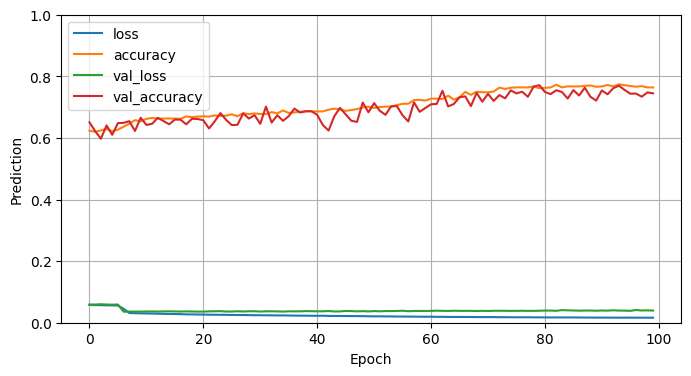

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Prediction')
plt.show()

In [37]:
# evaluate the model
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.771, Test: 0.745


In [38]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Prediction')
pyplot.legend()

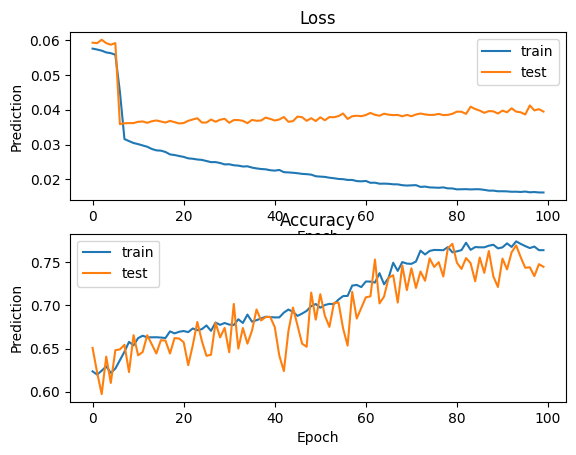

In [39]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
plt.xlabel('Epoch')
plt.ylabel('Prediction')
pyplot.show()

## 8. Conclusion <a class="anchor" id="conclusion"></a>

By comparing the computed results we can see that the best model for this dataset is  ` Random Forest`